In [1]:
from sparse_tools_F17 import *
from survey_params import *

model = 'F17'

sphx_par = spherex_param()
dth = sphx_par.dth
nu_binedges = sphx_par.nu_binedges
nu_bins = sphx_par.nu_bins
line_use = ['Lya', 'Ha', 'Hb', 'OII', 'OIII']

A, I_norm, z_coords, N_nu, N_z, z_coords_all, z_idx, I_coords_all \
= sparse_dict(dth, nu_binedges, line_use, model = model)

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


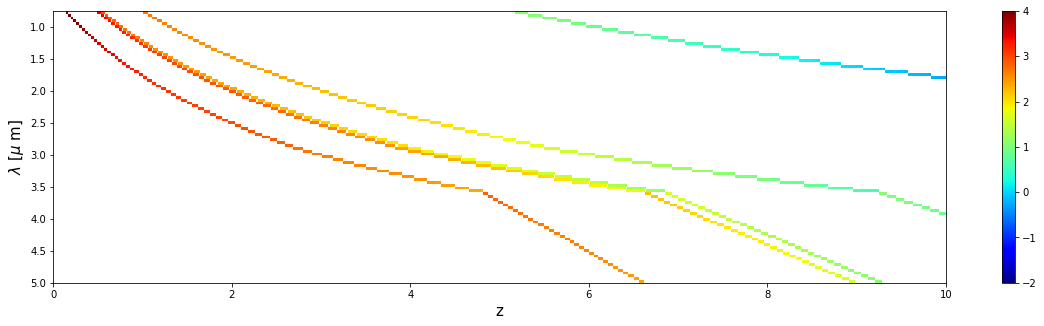

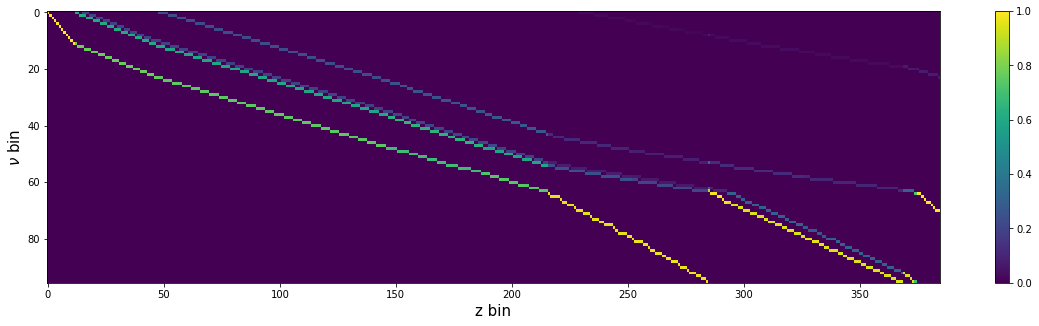

In [32]:
#
plt.figure(figsize=(20,5))
ext = [z_coords_all[0], z_coords_all[-1], sphx_par.wl_binedges[-1], sphx_par.wl_binedges[0]]
plt.imshow(np.log10(I_coords_all), aspect='auto', extent = ext, vmin = -2, vmax = 4, cmap = "jet")
plt.colorbar()
plt.xlabel('z',fontsize=15)
plt.ylabel(r'$\lambda$ [$\mu$ m]',fontsize=15)

plt.figure(figsize=(20,5))
plt.imshow(A, aspect='auto', vmin = 0, vmax = 1)
plt.xlabel('z bin',fontsize=15)
plt.ylabel(r'$\nu$ bin',fontsize=15)
plt.colorbar()

In [12]:
N_lc = 1
line_targ_vec = line_use
sigI = 50
C = 0

N_true, Itrue_all, Itrue_targ \
   = gen_lightcone_toy(N_lc, dth, nu_binedges, z_coords_all, I_coords_all,\
                       z_idx, line_use, line_targ_vec, model = model)
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape) + C

alpha = 30
N_pred = run_lasso(A, I_norm, Iobs_all, alpha)
_, Ipred_targ = gen_Ipred\
    (z_coords, N_pred, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

alpha = 30
sig_cut = 1.
Iobs_all_dn = Iobs_all.copy()
Iobs_all_dn[Iobs_all_dn < sig_cut * sigI] = 0
N_pred_dn = run_lasso(A, I_norm, Iobs_all_dn, alpha)
_, Ipred_targ_dn = gen_Ipred\
    (z_coords, N_pred_dn, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

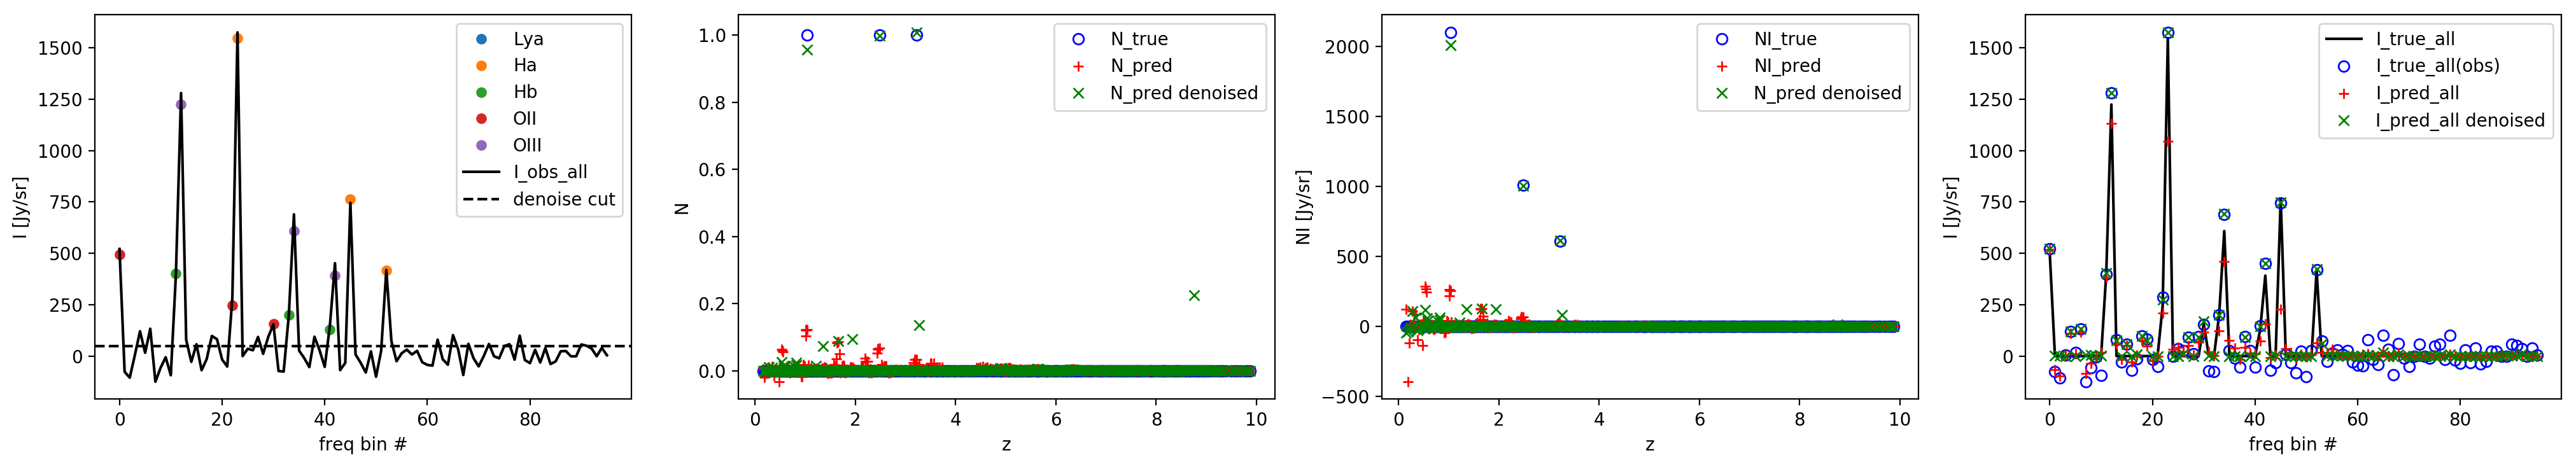

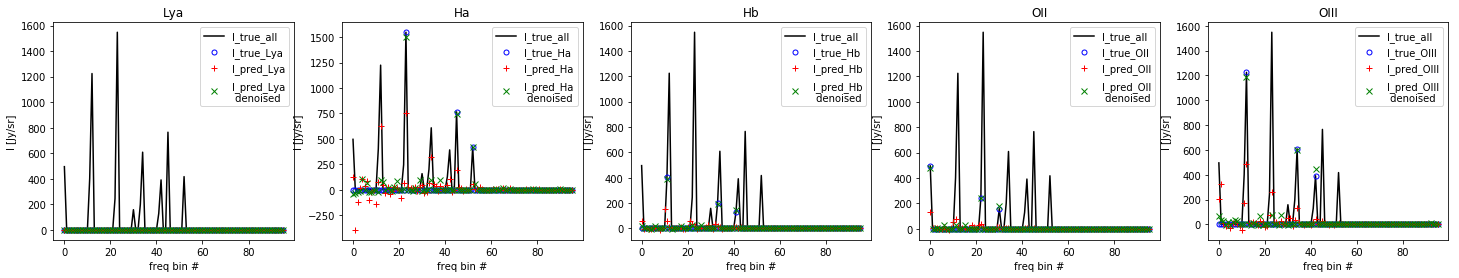

In [13]:
#
fig, ax = plt.subplots(1,4,figsize = (25,4), dpi = 200)
for j in range(len(line_targ_vec)):
    sp = np.where(Itrue_targ[j,0,:] != 0)[0]
    ax[0].plot(np.arange(N_nu)[sp],Itrue_targ[j,0,:][sp],'o', \
               label = line_targ_vec[j], markersize = 5)
ax[0].plot(Iobs_all[0,:],'k', label = 'I_obs_all')
ax[0].axhline(sig_cut * sigI, c = 'k', ls = '--', label = 'denoise cut')
ax[0].legend(loc = 0)
ax[0].set_xlabel('freq bin #')
ax[0].set_ylabel('I [Jy/sr]')

ax[1].plot(z_coords, N_true[0,:], 'bo', markerfacecolor='None', label='N_true')
ax[1].plot(z_coords, N_pred[0],'r+',label='N_pred')
ax[1].plot(z_coords, N_pred_dn[0],'gx',label='N_pred denoised')
ax[1].legend(loc = 0)
ax[1].set_xlabel('z')
ax[1].set_ylabel('N')

ax[2].plot(z_coords, N_true[0,:]*I_norm,' bo', markerfacecolor='None', label='NI_true')
ax[2].plot(z_coords, N_pred[0]*I_norm,'r+',label='NI_pred')
ax[2].plot(z_coords, N_pred_dn[0]*I_norm,'gx',label='N_pred denoised')
ax[2].legend(loc = 0)
ax[2].set_xlabel('z')
ax[2].set_ylabel('NI [Jy/sr]')

ax[3].plot(Itrue_all[0,:],'k-', markerfacecolor='None',label='I_true_all')
ax[3].plot(Iobs_all[0,:],'bo', markerfacecolor='None',label='I_true_all(obs)')
ax[3].plot(((N_pred[0,:] * I_norm).reshape(-1,N_pred.shape[1]) @ A.T).flatten(),'r+',label='I_pred_all')
ax[3].plot(((N_pred_dn[0,:] * I_norm).reshape(-1,N_pred.shape[1]) @ A.T).flatten(),\
           'gx',label='I_pred_all denoised')
ax[3].legend(loc = 0)
ax[3].set_xlabel('freq bin #')
ax[3].set_ylabel('I [Jy/sr]')

fig, ax = plt.subplots(1,5,figsize = (25,4))
for j in range(len(line_targ_vec)):
    ax[j].plot(Itrue_all[0,:],'k-', label='I_true_all')
    ax[j].plot(Itrue_targ[j,0,:],'bo', markerfacecolor='None', markersize = 5, \
                  label='I_true_' + line_targ_vec[j])
    ax[j].plot(Ipred_targ[j,0,:],'r+', label='I_pred_' + line_targ_vec[j])
    ax[j].plot(Ipred_targ_dn[j,0,:],'gx', label='I_pred_' + line_targ_vec[j] + '\n denoised')
    ax[j].legend(loc = 0)
    ax[j].set_title(line_targ_vec[j])
    ax[j].set_xlabel('freq bin #')
    ax[j].set_ylabel('I [Jy/sr]')

In [38]:
N_lc = 1000
line_targ_vec = line_use
sigI = 10
C = 0

N_true, Itrue_all, Itrue_targ \
   = gen_lightcone_toy(N_lc, dth, nu_binedges, z_coords_all, I_coords_all,\
                       z_idx, line_use, line_targ_vec, model = model)
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape) + C

alpha = 50
N_pred = run_lasso(A, I_norm, Iobs_all, alpha)
_, Ipred_targ = gen_Ipred\
    (z_coords, N_pred, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

alpha = 50
sig_cut = 1.
Iobs_all_dn = Iobs_all.copy()
Iobs_all_dn[Iobs_all_dn < sig_cut * sigI] = 0
N_pred_dn = run_lasso(A, I_norm, Iobs_all_dn, alpha)
_, Ipred_targ_dn = gen_Ipred\
    (z_coords, N_pred_dn, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

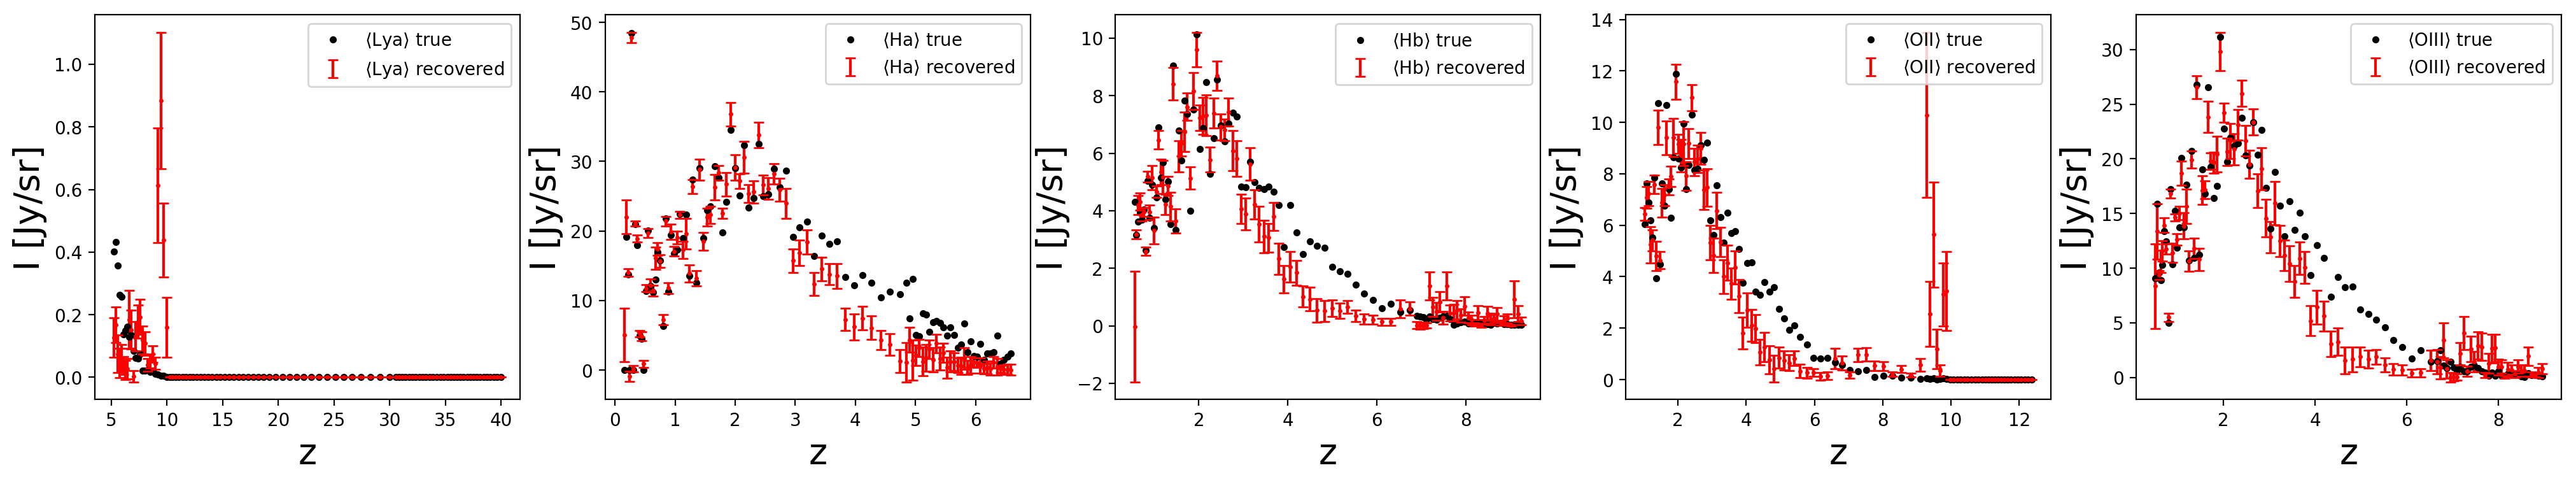

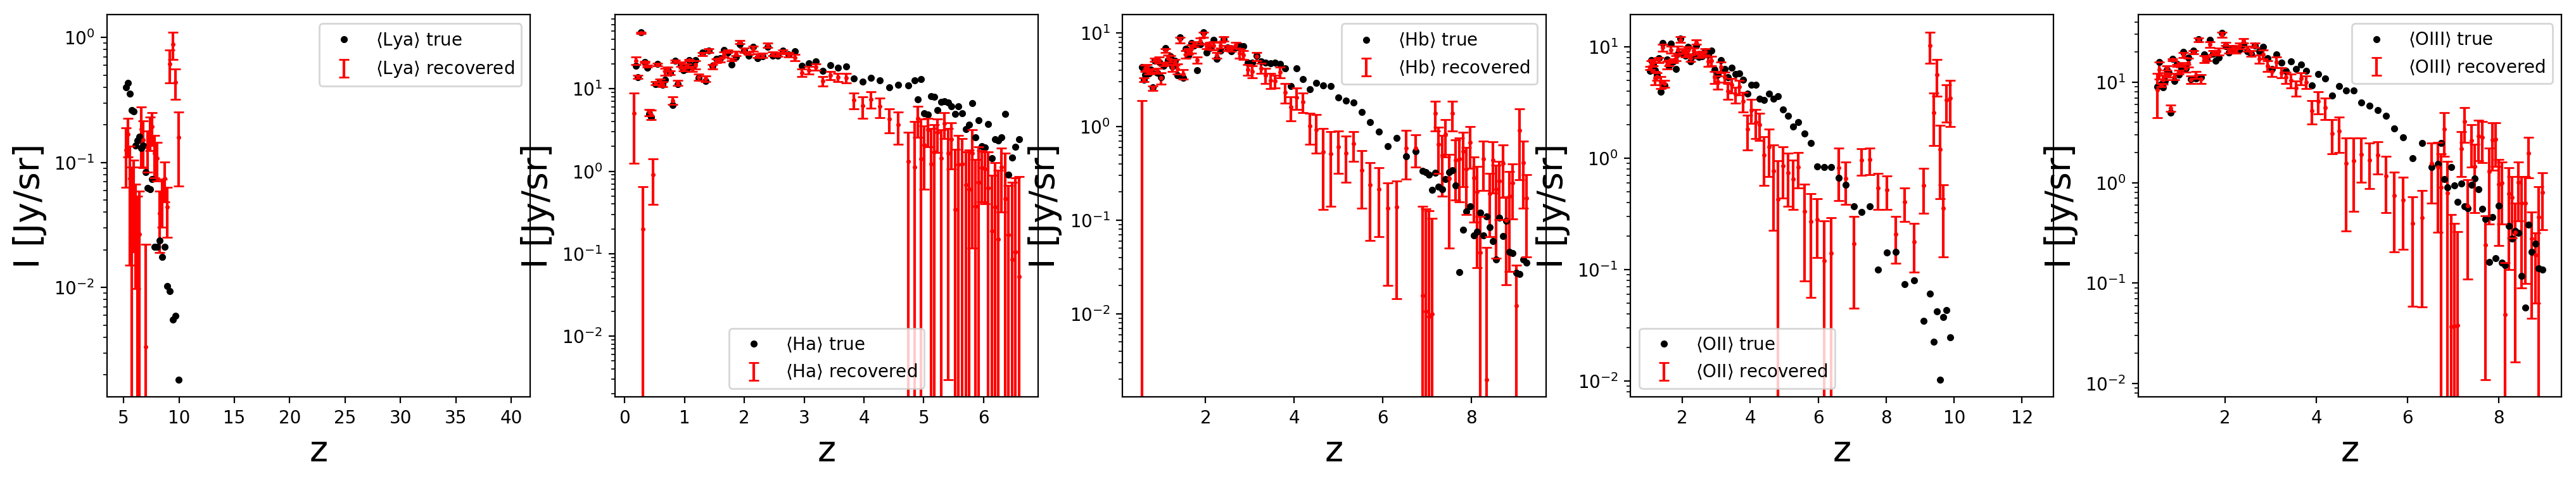

In [39]:
#
nu0_arr = [spec_lines.Lya.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.Ha.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.Hb.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.OII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.OIII.to(u.GHz, equivalencies=u.spectral()).value]

fig, ax = plt.subplots(1,5,figsize=(25,4),dpi=200)
for jtarg, line_name in enumerate(line_targ_vec):
    nu0 = nu0_arr[jtarg]
    zbins = nu0 / sphx_par.nu_bins - 1
    mu = np.mean(Itrue_targ[jtarg,:,:], axis=0)
    ax[jtarg].plot(zbins, mu, 'ko', markersize = 3,\
                  label = r'$\langle$' + line_name + r'$\rangle$ true')
    mu = np.nanmean(Ipred_targ[jtarg,:,:], axis=0)
    sig = np.sqrt(np.nanmean((Ipred_targ[jtarg,:,:] - Itrue_targ[jtarg,:,:])**2, axis = 0) / \
             np.sum(~np.isnan(Ipred_targ[jtarg,:,:]), axis = 0))
    ax[jtarg].errorbar(zbins, mu, sig, c = 'r', fmt = 'none', capsize = 3,\
                  label = r'$\langle$' + line_name + r'$\rangle$ recovered')
    ax[jtarg].plot(zbins, mu, 'ro', markersize = 1.5)
    ax[jtarg].legend(loc = 0, fontsize = 10)
    ax[jtarg].set_xlabel('z', fontsize = 20)
    ax[jtarg].set_ylabel('I [Jy/sr]', fontsize = 20)

fig, ax = plt.subplots(1,5,figsize=(25,4),dpi=200)
for jtarg, line_name in enumerate(line_targ_vec):
    nu0 = nu0_arr[jtarg]
    zbins = nu0 / sphx_par.nu_bins - 1
    mu = np.mean(Itrue_targ[jtarg,:,:], axis=0)
    ax[jtarg].plot(zbins, mu, 'ko', markersize = 3,\
                  label = r'$\langle$' + line_name + r'$\rangle$ true')
    mu = np.nanmean(Ipred_targ[jtarg,:,:], axis=0)
    sig = np.sqrt(np.nanmean((Ipred_targ[jtarg,:,:] - Itrue_targ[jtarg,:,:])**2, axis = 0) / \
             np.sum(~np.isnan(Ipred_targ[jtarg,:,:]), axis = 0))
    ax[jtarg].errorbar(zbins, mu, sig, c = 'r', fmt = 'none', capsize = 3,\
                  label = r'$\langle$' + line_name + r'$\rangle$ recovered')
    ax[jtarg].plot(zbins, mu, 'ro', markersize = 1.5)
    ax[jtarg].legend(loc = 0, fontsize = 10)
    ax[jtarg].set_xlabel('z', fontsize = 20)
    ax[jtarg].set_ylabel('I [Jy/sr]', fontsize = 20)
    ax[jtarg].set_yscale('log')

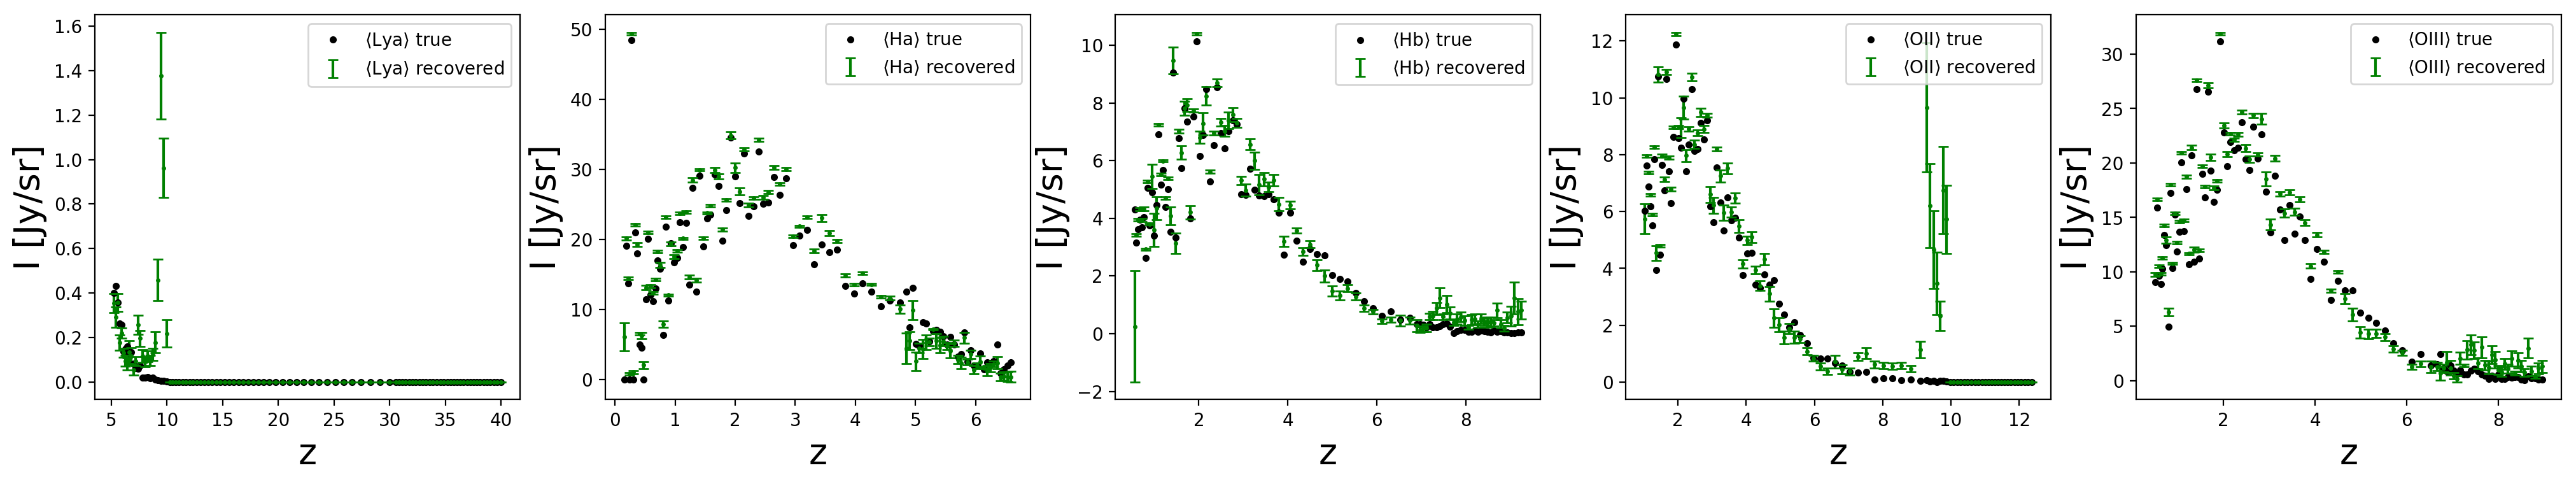

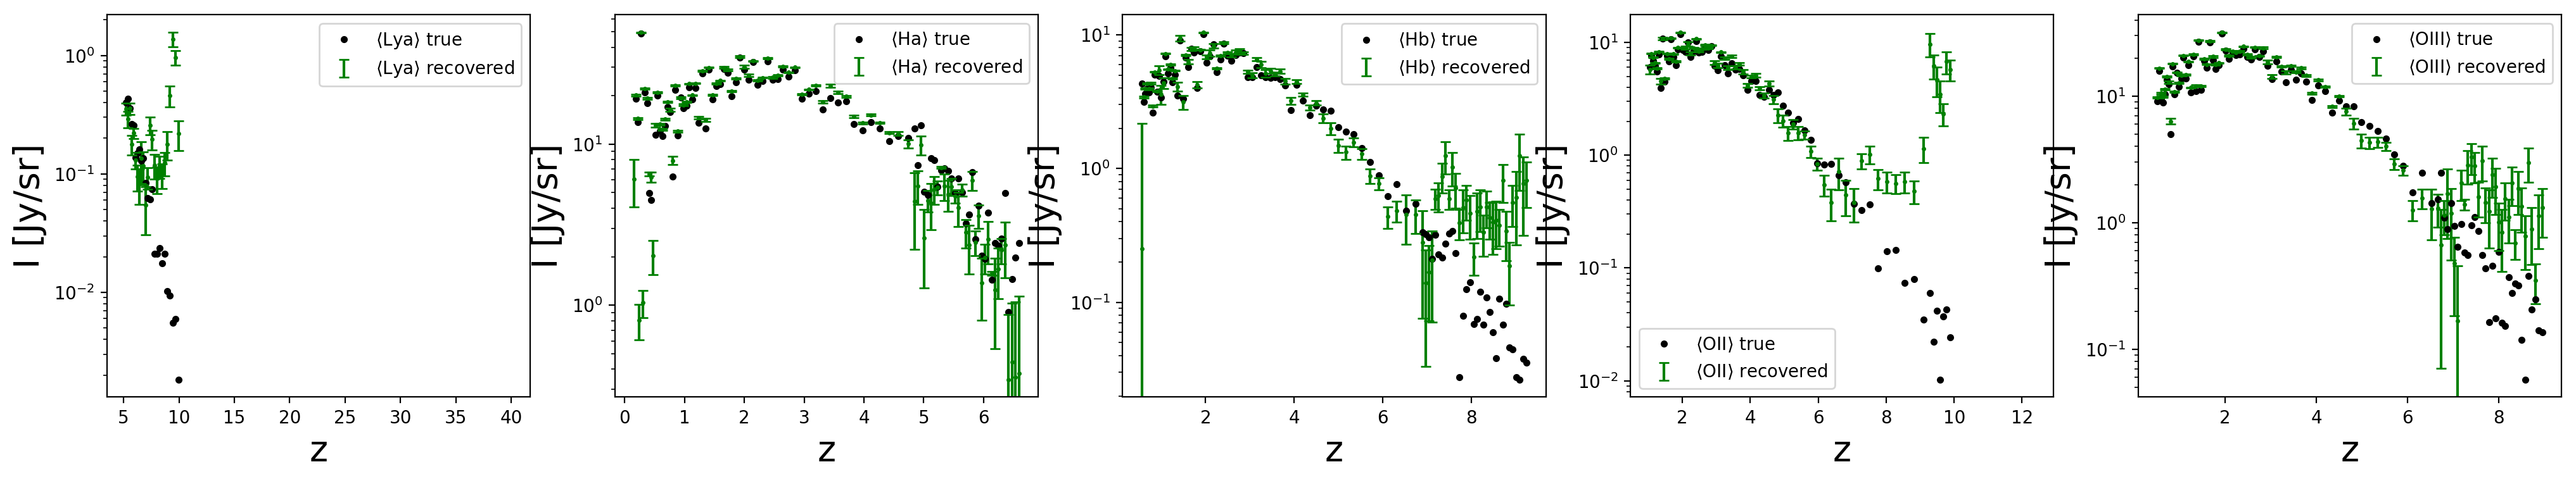

In [42]:
#
nu0_arr = [spec_lines.Lya.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.Ha.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.Hb.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.OII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.OIII.to(u.GHz, equivalencies=u.spectral()).value]

fig, ax = plt.subplots(1,5,figsize=(25,4),dpi=200)
for jtarg, line_name in enumerate(line_targ_vec):
    nu0 = nu0_arr[jtarg]
    zbins = nu0 / sphx_par.nu_bins - 1
    mu = np.mean(Itrue_targ[jtarg,:,:], axis=0)
    ax[jtarg].plot(zbins, mu, 'ko', markersize = 3,\
                  label = r'$\langle$' + line_name + r'$\rangle$ true')
    mu = np.nanmean(Ipred_targ_dn[jtarg,:,:], axis=0)
    sig = np.sqrt(np.nanmean((Ipred_targ_dn[jtarg,:,:] - Itrue_targ[jtarg,:,:])**2, axis = 0) / \
             np.sum(~np.isnan(Ipred_targ_dn[jtarg,:,:]), axis = 0))
    ax[jtarg].errorbar(zbins, mu, sig, c = 'g', fmt = 'none', capsize = 3,\
                  label = r'$\langle$' + line_name + r'$\rangle$ recovered')
    ax[jtarg].plot(zbins, mu, 'go', markersize = 1.5)
    ax[jtarg].legend(loc = 0, fontsize = 10)
    ax[jtarg].set_xlabel('z', fontsize = 20)
    ax[jtarg].set_ylabel('I [Jy/sr]', fontsize = 20)

fig, ax = plt.subplots(1,5,figsize=(25,4),dpi=200)
for jtarg, line_name in enumerate(line_targ_vec):
    nu0 = nu0_arr[jtarg]
    zbins = nu0 / sphx_par.nu_bins - 1
    mu = np.mean(Itrue_targ[jtarg,:,:], axis=0)
    ax[jtarg].plot(zbins, mu, 'ko', markersize = 3,\
                  label = r'$\langle$' + line_name + r'$\rangle$ true')
    mu = np.nanmean(Ipred_targ_dn[jtarg,:,:], axis=0)
    sig = np.sqrt(np.nanmean((Ipred_targ_dn[jtarg,:,:] - Itrue_targ[jtarg,:,:])**2, axis = 0) / \
             np.sum(~np.isnan(Ipred_targ_dn[jtarg,:,:]), axis = 0))
    ax[jtarg].errorbar(zbins, mu, sig, c = 'g', fmt = 'none', capsize = 3,\
                  label = r'$\langle$' + line_name + r'$\rangle$ recovered')
    ax[jtarg].plot(zbins, mu, 'go', markersize = 1.5)
    ax[jtarg].legend(loc = 0, fontsize = 10)
    ax[jtarg].set_xlabel('z', fontsize = 20)
    ax[jtarg].set_ylabel('I [Jy/sr]', fontsize = 20)
    ax[jtarg].set_yscale('log')

Text(0,0.5,'<N>')

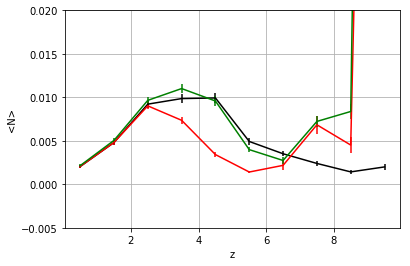

In [40]:
#
z_binedges = np.linspace(0,10,11)
zbins = (z_binedges[1:] + z_binedges[:-1]) / 2

mu_true_broad = np.zeros_like(zbins)
mu_pred_broad = np.zeros_like(zbins)
mu_pred_dn_broad = np.zeros_like(zbins)
sig_true_broad = np.zeros_like(zbins)
sig_pred_broad = np.zeros_like(zbins)
sig_pred_dn_broad = np.zeros_like(zbins)
for i,z in enumerate(zbins):
    sp = np.where((z_coords >= z_binedges[i]) & (z_coords < z_binedges[i+1]))[0]
    N_truei = N_true[:,sp]
    mu_true_broad[i] = np.nanmean(N_truei)
    sig_true_broad[i] = np.nanstd(N_truei) / np.sqrt(np.sum(~np.isnan(N_truei)))
    N_predi = N_pred[:,sp]
    mu_pred_broad[i] = np.nanmean(N_predi)
    sig_pred_broad[i] = np.nanstd(N_predi) / np.sqrt(np.sum(~np.isnan(N_predi)))
    N_pred_dni = N_pred_dn[:,sp]
    mu_pred_dn_broad[i] = np.nanmean(N_pred_dni)
    sig_pred_dn_broad[i] = np.nanstd(N_pred_dni) / np.sqrt(np.sum(~np.isnan(N_pred_dni)))
    
plt.errorbar(zbins, mu_true_broad, sig_true_broad, c='k')
plt.errorbar(zbins, mu_pred_broad, sig_pred_broad, c='r')
plt.errorbar(zbins, mu_pred_dn_broad, sig_pred_dn_broad, c='g')
plt.ylim([-0.005,0.02])
plt.grid()
plt.xlabel('z')
plt.ylabel('<N>')

In [100]:
N_lc = 1000
line_targ_vec = line_use
sigI = 50
C = 0

N_true, Itrue_all, Itrue_targ \
   = gen_lightcone_toy(N_lc, dth, nu_binedges, z_coords_all, I_coords_all,\
                       z_idx, line_use, line_targ_vec, model = model)
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape) + C

alpha = 30
N_pred = run_lasso(A, I_norm, Iobs_all, alpha)
_, Ipred_targ = gen_Ipred\
    (z_coords, N_pred, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

alpha = 30
sig_cut = 1.
Iobs_all_dn = Iobs_all.copy()
Iobs_all_dn[Iobs_all_dn < sig_cut * sigI] = 0
N_pred_dn = run_lasso(A, I_norm, Iobs_all_dn, alpha)
_, Ipred_targ_dn = gen_Ipred\
    (z_coords, N_pred_dn, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

Text(0,0.5,'<N>')

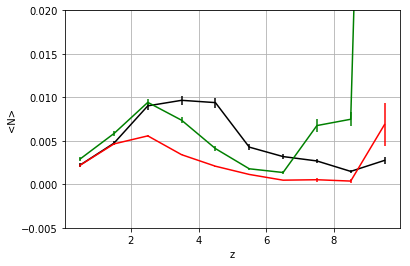

In [102]:
#
z_binedges = np.linspace(0,10,11)
zbins = (z_binedges[1:] + z_binedges[:-1]) / 2

mu_true_broad = np.zeros_like(zbins)
mu_pred_broad = np.zeros_like(zbins)
mu_pred_dn_broad = np.zeros_like(zbins)
sig_true_broad = np.zeros_like(zbins)
sig_pred_broad = np.zeros_like(zbins)
sig_pred_dn_broad = np.zeros_like(zbins)
for i,z in enumerate(zbins):
    sp = np.where((z_coords >= z_binedges[i]) & (z_coords < z_binedges[i+1]))[0]
    N_truei = N_true[:,sp]
    mu_true_broad[i] = np.nanmean(N_truei)
    sig_true_broad[i] = np.nanstd(N_truei) / np.sqrt(np.sum(~np.isnan(N_truei)))
    N_predi = N_pred[:,sp]
    mu_pred_broad[i] = np.nanmean(N_predi)
    sig_pred_broad[i] = np.nanstd(N_predi) / np.sqrt(np.sum(~np.isnan(N_predi)))
    N_pred_dni = N_pred_dn[:,sp]
    mu_pred_dn_broad[i] = np.nanmean(N_pred_dni)
    sig_pred_dn_broad[i] = np.nanstd(N_pred_dni) / np.sqrt(np.sum(~np.isnan(N_pred_dni)))
    
plt.errorbar(zbins, mu_true_broad, sig_true_broad, c='k')
plt.errorbar(zbins, mu_pred_broad, sig_pred_broad, c='r')
plt.errorbar(zbins, mu_pred_dn_broad, sig_pred_dn_broad, c='g')
plt.ylim([-0.005,0.02])
plt.grid()
plt.xlabel('z')
plt.ylabel('<N>')

In [6]:
N_lc = 1000
line_targ_vec = line_use
sigI = 100
C = 0

N_true, Itrue_all, Itrue_targ \
   = gen_lightcone_toy(N_lc, dth, nu_binedges, z_coords_all, I_coords_all,\
                       z_idx, line_use, line_targ_vec, model = model)
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape) + C

alpha = 50
N_pred = run_lasso(A, I_norm, Iobs_all, alpha)
_, Ipred_targ = gen_Ipred\
    (z_coords, N_pred, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

alpha = 50
sig_cut = 1.
Iobs_all_dn = Iobs_all.copy()
Iobs_all_dn[Iobs_all_dn < sig_cut * sigI] = 0
N_pred_dn = run_lasso(A, I_norm, Iobs_all_dn, alpha)
_, Ipred_targ_dn = gen_Ipred\
    (z_coords, N_pred_dn, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

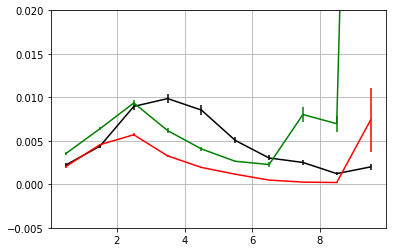

In [68]:
#
z_binedges = np.linspace(0,10,11)
zbins = (z_binedges[1:] + z_binedges[:-1]) / 2

mu_true_broad = np.zeros_like(zbins)
mu_pred_broad = np.zeros_like(zbins)
mu_pred_dn_broad = np.zeros_like(zbins)
sig_true_broad = np.zeros_like(zbins)
sig_pred_broad = np.zeros_like(zbins)
sig_pred_dn_broad = np.zeros_like(zbins)
for i,z in enumerate(zbins):
    sp = np.where((z_coords >= z_binedges[i]) & (z_coords < z_binedges[i+1]))[0]
    N_truei = N_true[:,sp]
    mu_true_broad[i] = np.nanmean(N_truei)
    sig_true_broad[i] = np.nanstd(N_truei) / np.sqrt(np.sum(~np.isnan(N_truei)))
    N_predi = N_pred[:,sp]
    mu_pred_broad[i] = np.nanmean(N_predi)
    sig_pred_broad[i] = np.nanstd(N_predi) / np.sqrt(np.sum(~np.isnan(N_predi)))
    N_pred_dni = N_pred_dn[:,sp]
    mu_pred_dn_broad[i] = np.nanmean(N_pred_dni)
    sig_pred_dn_broad[i] = np.nanstd(N_pred_dni) / np.sqrt(np.sum(~np.isnan(N_pred_dni)))
    
plt.errorbar(zbins, mu_true_broad, sig_true_broad, c='k')
plt.errorbar(zbins, mu_pred_broad, sig_pred_broad, c='r')
plt.errorbar(zbins, mu_pred_dn_broad, sig_pred_dn_broad, c='g')
plt.ylim([-0.005,0.02])
plt.grid()
plt.xlabel('z')
plt.ylabel('<N>')

=====================================
# Full luminosity funtion
=====================================


In [30]:
N_lc = 1
line_targ_vec = line_use
sigI = 10
C = 0

N_true, Itrue_all, Itrue_targ = gen_lightcone(N_lc, dth, nu_binedges, z_coords_all, \
                      I_coords_all, z_idx, line_use, line_targ_vec, model = model)
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape) + C

alpha = 50
N_pred = run_lasso(A, I_norm, Iobs_all, alpha)
_, Ipred_targ = gen_Ipred\
    (z_coords, N_pred, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

alpha = 50
sig_cut = 1.
Iobs_all_dn = Iobs_all.copy()
Iobs_all_dn[Iobs_all_dn < sig_cut * sigI] = 0
N_pred_dn = run_lasso(A, I_norm, Iobs_all_dn, alpha)
_, Ipred_targ_dn = gen_Ipred\
    (z_coords, N_pred_dn, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

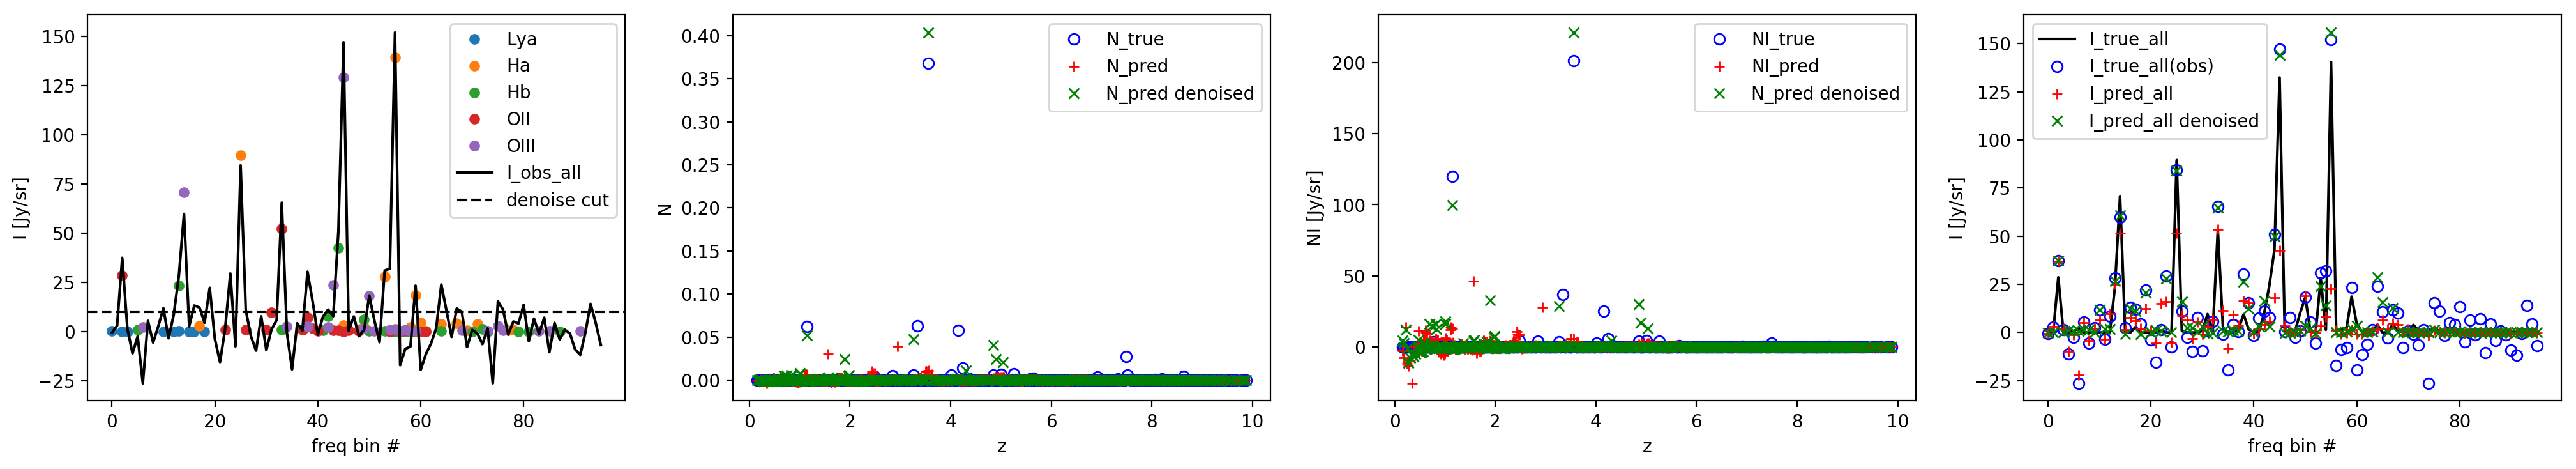

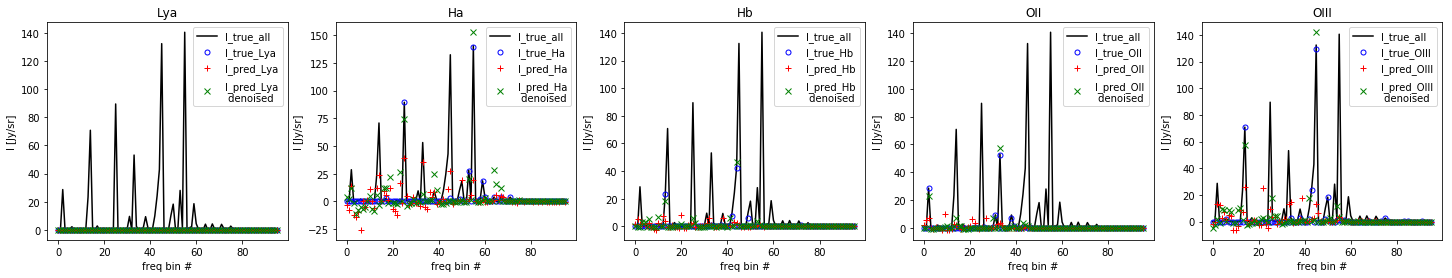

In [31]:
#
fig, ax = plt.subplots(1,4,figsize = (25,4), dpi = 200)
for j in range(len(line_targ_vec)):
    sp = np.where(Itrue_targ[j,0,:] != 0)[0]
    ax[0].plot(np.arange(N_nu)[sp],Itrue_targ[j,0,:][sp],'o', \
               label = line_targ_vec[j], markersize = 5)
ax[0].plot(Iobs_all[0,:],'k', label = 'I_obs_all')
ax[0].axhline(sig_cut * sigI, c = 'k', ls = '--', label = 'denoise cut')
ax[0].legend(loc = 0)
ax[0].set_xlabel('freq bin #')
ax[0].set_ylabel('I [Jy/sr]')

ax[1].plot(z_coords, N_true[0,:], 'bo', markerfacecolor='None', label='N_true')
ax[1].plot(z_coords, N_pred[0],'r+',label='N_pred')
ax[1].plot(z_coords, N_pred_dn[0],'gx',label='N_pred denoised')
ax[1].legend(loc = 0)
ax[1].set_xlabel('z')
ax[1].set_ylabel('N')

ax[2].plot(z_coords, N_true[0,:]*I_norm,' bo', markerfacecolor='None', label='NI_true')
ax[2].plot(z_coords, N_pred[0]*I_norm,'r+',label='NI_pred')
ax[2].plot(z_coords, N_pred_dn[0]*I_norm,'gx',label='N_pred denoised')
ax[2].legend(loc = 0)
ax[2].set_xlabel('z')
ax[2].set_ylabel('NI [Jy/sr]')

ax[3].plot(Itrue_all[0,:],'k-', markerfacecolor='None',label='I_true_all')
ax[3].plot(Iobs_all[0,:],'bo', markerfacecolor='None',label='I_true_all(obs)')
ax[3].plot(((N_pred[0,:] * I_norm).reshape(-1,N_pred.shape[1]) @ A.T).flatten(),'r+',label='I_pred_all')
ax[3].plot(((N_pred_dn[0,:] * I_norm).reshape(-1,N_pred.shape[1]) @ A.T).flatten(),\
           'gx',label='I_pred_all denoised')
ax[3].legend(loc = 0)
ax[3].set_xlabel('freq bin #')
ax[3].set_ylabel('I [Jy/sr]')

fig, ax = plt.subplots(1,5,figsize = (25,4))
for j in range(len(line_targ_vec)):
    ax[j].plot(Itrue_all[0,:],'k-', label='I_true_all')
    ax[j].plot(Itrue_targ[j,0,:],'bo', markerfacecolor='None', markersize = 5, \
                  label='I_true_' + line_targ_vec[j])
    ax[j].plot(Ipred_targ[j,0,:],'r+', label='I_pred_' + line_targ_vec[j])
    ax[j].plot(Ipred_targ_dn[j,0,:],'gx', label='I_pred_' + line_targ_vec[j] + '\n denoised')
    ax[j].legend(loc = 0)
    ax[j].set_title(line_targ_vec[j])
    ax[j].set_xlabel('freq bin #')
    ax[j].set_ylabel('I [Jy/sr]')

In [12]:
N_lc = 1000
line_targ_vec = line_use
sigI = 10
C = 0

N_true, Itrue_all, Itrue_targ = gen_lightcone(N_lc, dth, nu_binedges, z_coords_all, \
                      I_coords_all, z_idx, line_use, line_targ_vec, model = model)
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape) + C

alpha = 50
N_pred = run_lasso(A, I_norm, Iobs_all, alpha)
_, Ipred_targ = gen_Ipred\
    (z_coords, N_pred, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

alpha = 50
sig_cut = 1.
Iobs_all_dn = Iobs_all.copy()
Iobs_all_dn[Iobs_all_dn < sig_cut * sigI] = 0
N_pred_dn = run_lasso(A, I_norm, Iobs_all_dn, alpha)
_, Ipred_targ_dn = gen_Ipred\
    (z_coords, N_pred_dn, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

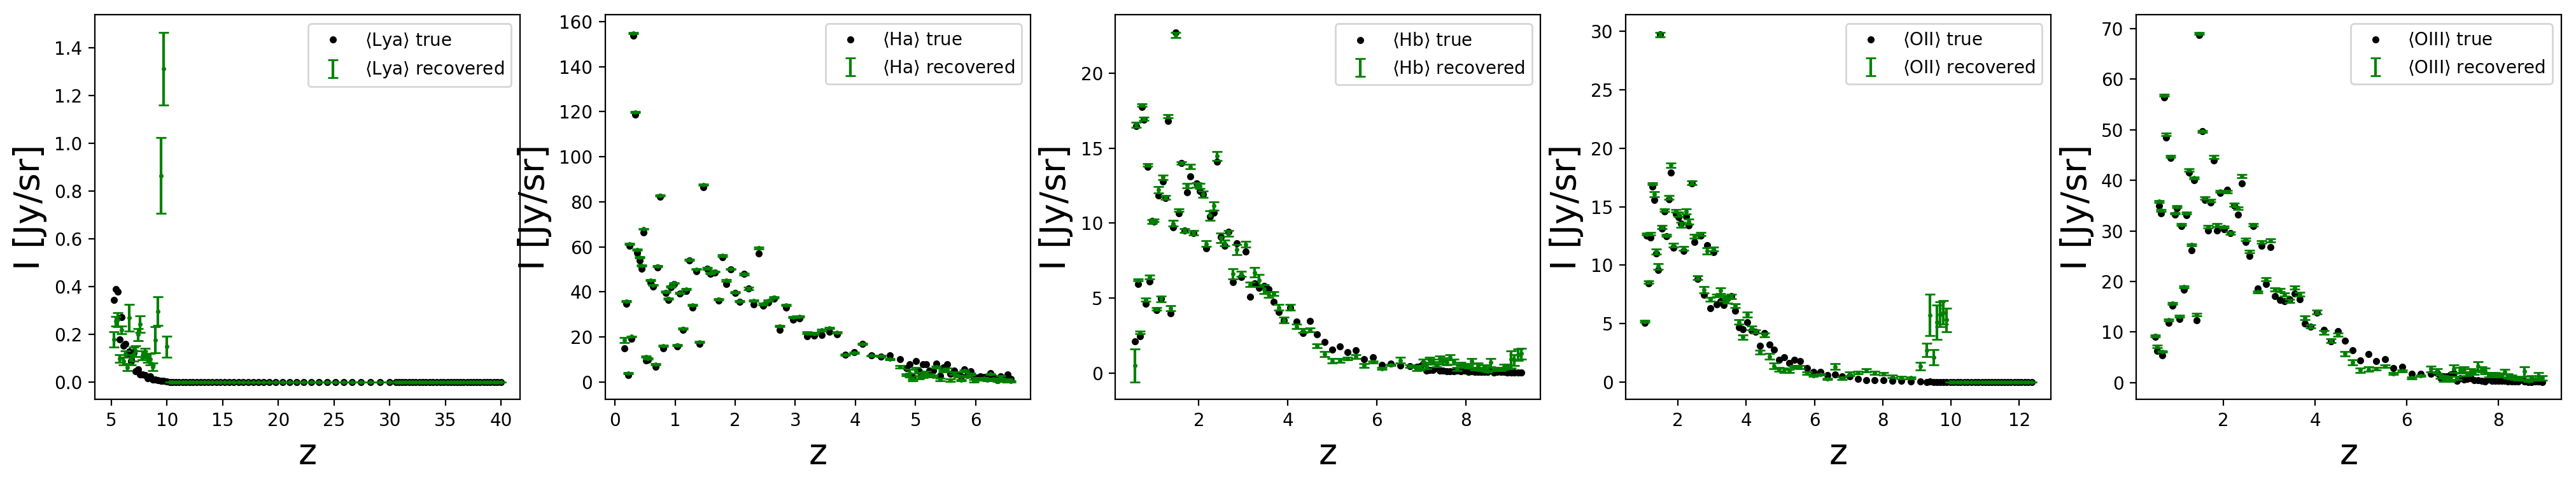

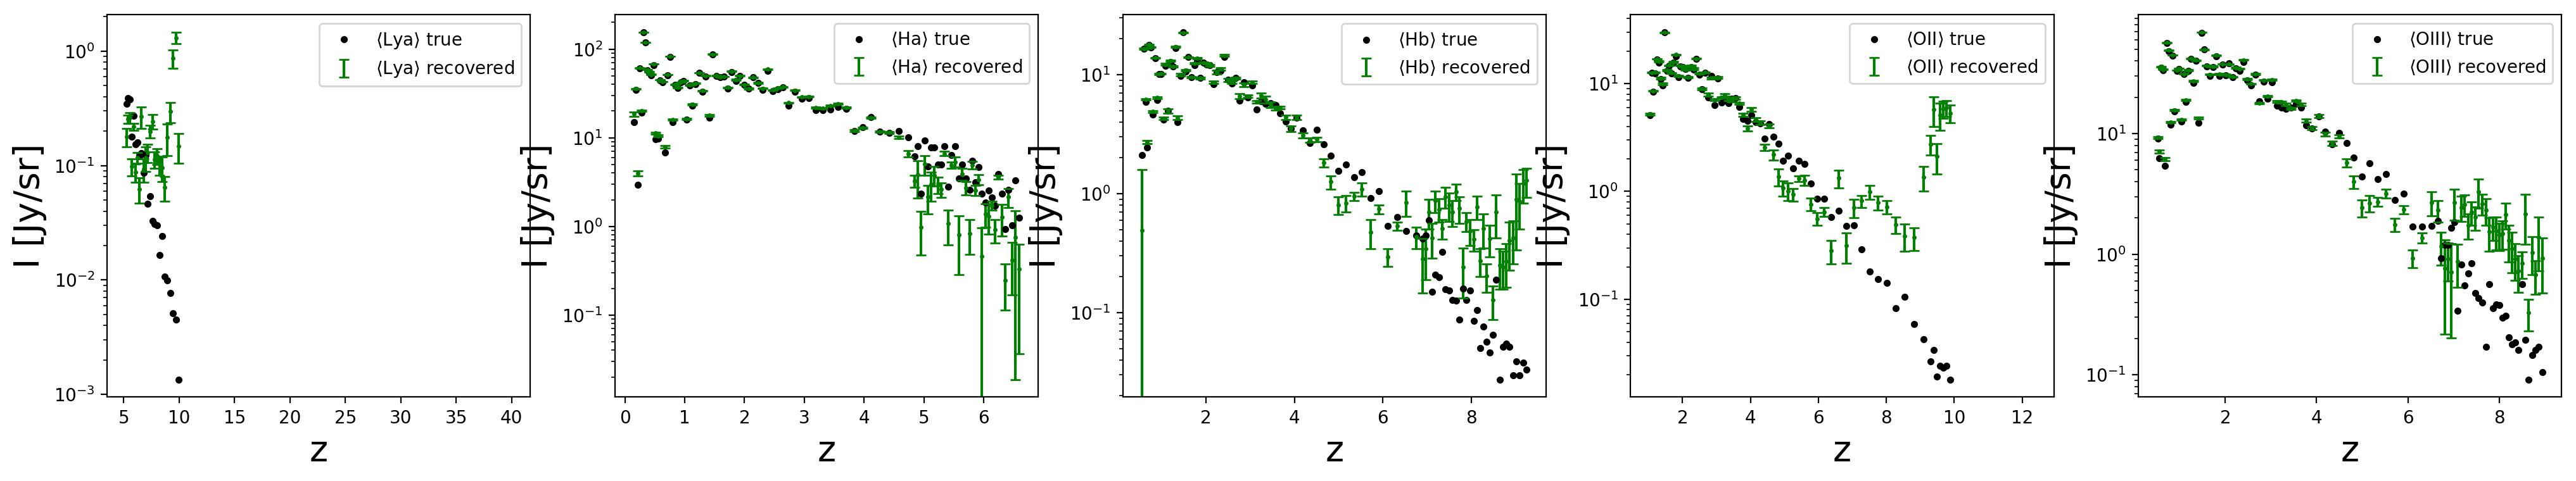

In [14]:
#
nu0_arr = [spec_lines.Lya.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.Ha.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.Hb.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.OII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.OIII.to(u.GHz, equivalencies=u.spectral()).value]

fig, ax = plt.subplots(1,5,figsize=(25,4),dpi=200)
for jtarg, line_name in enumerate(line_targ_vec):
    nu0 = nu0_arr[jtarg]
    zbins = nu0 / sphx_par.nu_bins - 1
    mu = np.mean(Itrue_targ[jtarg,:,:], axis=0)
    ax[jtarg].plot(zbins, mu, 'ko', markersize = 3,\
                  label = r'$\langle$' + line_name + r'$\rangle$ true')
    mu = np.nanmean(Ipred_targ_dn[jtarg,:,:], axis=0)
    sig = np.sqrt(np.nanmean((Ipred_targ_dn[jtarg,:,:] - Itrue_targ[jtarg,:,:])**2, axis = 0) / \
             np.sum(~np.isnan(Ipred_targ_dn[jtarg,:,:]), axis = 0))
    ax[jtarg].errorbar(zbins, mu, sig, c = 'g', fmt = 'none', capsize = 3,\
                  label = r'$\langle$' + line_name + r'$\rangle$ recovered')
    ax[jtarg].plot(zbins, mu, 'go', markersize = 1.5)
    ax[jtarg].legend(loc = 0, fontsize = 10)
    ax[jtarg].set_xlabel('z', fontsize = 20)
    ax[jtarg].set_ylabel('I [Jy/sr]', fontsize = 20)

fig, ax = plt.subplots(1,5,figsize=(25,4),dpi=200)
for jtarg, line_name in enumerate(line_targ_vec):
    nu0 = nu0_arr[jtarg]
    zbins = nu0 / sphx_par.nu_bins - 1
    mu = np.mean(Itrue_targ[jtarg,:,:], axis=0)
    ax[jtarg].plot(zbins, mu, 'ko', markersize = 3,\
                  label = r'$\langle$' + line_name + r'$\rangle$ true')
    mu = np.nanmean(Ipred_targ_dn[jtarg,:,:], axis=0)
    sig = np.sqrt(np.nanmean((Ipred_targ_dn[jtarg,:,:] - Itrue_targ[jtarg,:,:])**2, axis = 0) / \
             np.sum(~np.isnan(Ipred_targ_dn[jtarg,:,:]), axis = 0))
    ax[jtarg].errorbar(zbins, mu, sig, c = 'g', fmt = 'none', capsize = 3,\
                  label = r'$\langle$' + line_name + r'$\rangle$ recovered')
    ax[jtarg].plot(zbins, mu, 'go', markersize = 1.5)
    ax[jtarg].legend(loc = 0, fontsize = 10)
    ax[jtarg].set_xlabel('z', fontsize = 20)
    ax[jtarg].set_ylabel('I [Jy/sr]', fontsize = 20)
    ax[jtarg].set_yscale('log')

Text(0,0.5,'<N>')

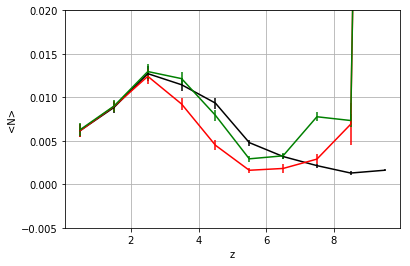

In [16]:
#
z_binedges = np.linspace(0,10,11)
zbins = (z_binedges[1:] + z_binedges[:-1]) / 2

mu_true_broad = np.zeros_like(zbins)
mu_pred_broad = np.zeros_like(zbins)
mu_pred_dn_broad = np.zeros_like(zbins)
sig_true_broad = np.zeros_like(zbins)
sig_pred_broad = np.zeros_like(zbins)
sig_pred_dn_broad = np.zeros_like(zbins)
for i,z in enumerate(zbins):
    sp = np.where((z_coords >= z_binedges[i]) & (z_coords < z_binedges[i+1]))[0]
    N_truei = N_true[:,sp]
    mu_true_broad[i] = np.nanmean(N_truei)
    sig_true_broad[i] = np.nanstd(N_truei) / np.sqrt(np.sum(~np.isnan(N_truei)))
    N_predi = N_pred[:,sp]
    mu_pred_broad[i] = np.nanmean(N_predi)
    sig_pred_broad[i] = np.nanstd(N_predi) / np.sqrt(np.sum(~np.isnan(N_predi)))
    N_pred_dni = N_pred_dn[:,sp]
    mu_pred_dn_broad[i] = np.nanmean(N_pred_dni)
    sig_pred_dn_broad[i] = np.nanstd(N_pred_dni) / np.sqrt(np.sum(~np.isnan(N_pred_dni)))
    
plt.errorbar(zbins, mu_true_broad, sig_true_broad, c='k')
plt.errorbar(zbins, mu_pred_broad, sig_pred_broad, c='r')
plt.errorbar(zbins, mu_pred_dn_broad, sig_pred_dn_broad, c='g')
plt.ylim([-0.005,0.02])
plt.grid()
plt.xlabel('z')
plt.ylabel('<N>')

In [17]:
N_lc = 1000
line_targ_vec = line_use
sigI = 50
C = 0

N_true, Itrue_all, Itrue_targ = gen_lightcone(N_lc, dth, nu_binedges, z_coords_all, \
                      I_coords_all, z_idx, line_use, line_targ_vec, model = model)
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape) + C

alpha = 30
N_pred = run_lasso(A, I_norm, Iobs_all, alpha)
_, Ipred_targ = gen_Ipred\
    (z_coords, N_pred, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

alpha = 30
sig_cut = 1.
Iobs_all_dn = Iobs_all.copy()
Iobs_all_dn[Iobs_all_dn < sig_cut * sigI] = 0
N_pred_dn = run_lasso(A, I_norm, Iobs_all_dn, alpha)
_, Ipred_targ_dn = gen_Ipred\
    (z_coords, N_pred_dn, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

Text(0,0.5,'<N>')

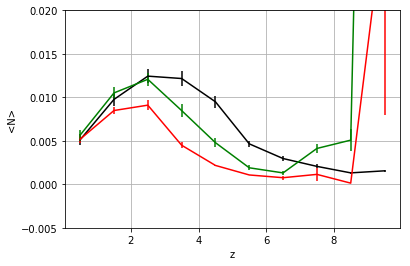

In [20]:
#
z_binedges = np.linspace(0,10,11)
zbins = (z_binedges[1:] + z_binedges[:-1]) / 2

mu_true_broad = np.zeros_like(zbins)
mu_pred_broad = np.zeros_like(zbins)
mu_pred_dn_broad = np.zeros_like(zbins)
sig_true_broad = np.zeros_like(zbins)
sig_pred_broad = np.zeros_like(zbins)
sig_pred_dn_broad = np.zeros_like(zbins)
for i,z in enumerate(zbins):
    sp = np.where((z_coords >= z_binedges[i]) & (z_coords < z_binedges[i+1]))[0]
    N_truei = N_true[:,sp]
    mu_true_broad[i] = np.nanmean(N_truei)
    sig_true_broad[i] = np.nanstd(N_truei) / np.sqrt(np.sum(~np.isnan(N_truei)))
    N_predi = N_pred[:,sp]
    mu_pred_broad[i] = np.nanmean(N_predi)
    sig_pred_broad[i] = np.nanstd(N_predi) / np.sqrt(np.sum(~np.isnan(N_predi)))
    N_pred_dni = N_pred_dn[:,sp]
    mu_pred_dn_broad[i] = np.nanmean(N_pred_dni)
    sig_pred_dn_broad[i] = np.nanstd(N_pred_dni) / np.sqrt(np.sum(~np.isnan(N_pred_dni)))
    
plt.errorbar(zbins, mu_true_broad, sig_true_broad, c='k')
plt.errorbar(zbins, mu_pred_broad, sig_pred_broad, c='r')
plt.errorbar(zbins, mu_pred_dn_broad, sig_pred_dn_broad, c='g')
plt.ylim([-0.005,0.02])
plt.grid()
plt.xlabel('z')
plt.ylabel('<N>')

In [54]:
N_lc = 1000
line_targ_vec = line_use
sigI = 100
C = 0

N_true, Itrue_all, Itrue_targ = gen_lightcone(N_lc, dth, nu_binedges, z_coords_all, \
                      I_coords_all, z_idx, line_use, line_targ_vec, model = model)
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape) + C

alpha = 50
N_pred = run_lasso(A, I_norm, Iobs_all, alpha)
_, Ipred_targ = gen_Ipred\
    (z_coords, N_pred, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

alpha = 50
sig_cut = 1.
Iobs_all_dn = Iobs_all.copy()
Iobs_all_dn[Iobs_all_dn < sig_cut * sigI] = 0
N_pred_dn = run_lasso(A, I_norm, Iobs_all_dn, alpha)
_, Ipred_targ_dn = gen_Ipred\
    (z_coords, N_pred_dn, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

Text(0,0.5,'<N>')

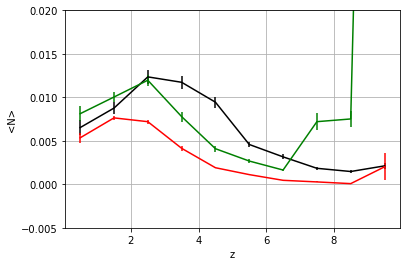

In [60]:
#
z_binedges = np.linspace(0,10,11)
zbins = (z_binedges[1:] + z_binedges[:-1]) / 2

mu_true_broad = np.zeros_like(zbins)
mu_pred_broad = np.zeros_like(zbins)
mu_pred_dn_broad = np.zeros_like(zbins)
sig_true_broad = np.zeros_like(zbins)
sig_pred_broad = np.zeros_like(zbins)
sig_pred_dn_broad = np.zeros_like(zbins)
for i,z in enumerate(zbins):
    sp = np.where((z_coords >= z_binedges[i]) & (z_coords < z_binedges[i+1]))[0]
    N_truei = N_true[:,sp]
    mu_true_broad[i] = np.nanmean(N_truei)
    sig_true_broad[i] = np.nanstd(N_truei) / np.sqrt(np.sum(~np.isnan(N_truei)))
    N_predi = N_pred[:,sp]
    mu_pred_broad[i] = np.nanmean(N_predi)
    sig_pred_broad[i] = np.nanstd(N_predi) / np.sqrt(np.sum(~np.isnan(N_predi)))
    N_pred_dni = N_pred_dn[:,sp]
    mu_pred_dn_broad[i] = np.nanmean(N_pred_dni)
    sig_pred_dn_broad[i] = np.nanstd(N_pred_dni) / np.sqrt(np.sum(~np.isnan(N_pred_dni)))
    
plt.errorbar(zbins, mu_true_broad, sig_true_broad, c='k')
plt.errorbar(zbins, mu_pred_broad, sig_pred_broad, c='r')
plt.errorbar(zbins, mu_pred_dn_broad, sig_pred_dn_broad, c='g')
plt.ylim([-0.005,0.02])
plt.grid()
plt.xlabel('z')
plt.ylabel('<N>')

## Comparing with results from matching pursuit algorithm

In [46]:
N_lc = 1000
line_targ_vec = line_use
sigI = 100
C = 0

N_true, Itrue_all, Itrue_targ = gen_lightcone(N_lc, dth, nu_binedges, z_coords_all, \
                      I_coords_all, z_idx, line_use, line_targ_vec, model = model)
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape) + C

alpha = 50
N_pred = run_lasso(A, I_norm, Iobs_all, alpha)
_, Ipred_targ = gen_Ipred\
    (z_coords, N_pred, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

alpha = 50
sig_cut = 1.
Iobs_all_dn = Iobs_all.copy()
Iobs_all_dn[Iobs_all_dn < sig_cut * sigI] = 0
N_pred_dn = run_lasso(A, I_norm, Iobs_all_dn, alpha)
_, Ipred_targ_dn = gen_Ipred\
    (z_coords, N_pred_dn, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)
    
e_th = sigI
N_pred_mp = run_MP(A, I_norm, Iobs_all, e_th)
_, Ipred_targ_mp = gen_Ipred\
    (z_coords, N_pred_mp, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

Text(0,0.5,'<N>')

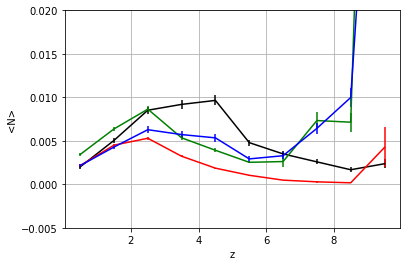

In [47]:
#
z_binedges = np.linspace(0,10,11)
zbins = (z_binedges[1:] + z_binedges[:-1]) / 2

mu_true_broad = np.zeros_like(zbins)
mu_pred_broad = np.zeros_like(zbins)
mu_pred_dn_broad = np.zeros_like(zbins)
mu_pred_mp_broad = np.zeros_like(zbins)
sig_true_broad = np.zeros_like(zbins)
sig_pred_broad = np.zeros_like(zbins)
sig_pred_dn_broad = np.zeros_like(zbins)
sig_pred_mp_broad = np.zeros_like(zbins)
for i,z in enumerate(zbins):
    sp = np.where((z_coords >= z_binedges[i]) & (z_coords < z_binedges[i+1]))[0]
    N_truei = N_true[:,sp]
    mu_true_broad[i] = np.nanmean(N_truei)
    sig_true_broad[i] = np.nanstd(N_truei) / np.sqrt(np.sum(~np.isnan(N_truei)))
    N_predi = N_pred[:,sp]
    mu_pred_broad[i] = np.nanmean(N_predi)
    sig_pred_broad[i] = np.nanstd(N_predi) / np.sqrt(np.sum(~np.isnan(N_predi)))
    N_pred_dni = N_pred_dn[:,sp]
    mu_pred_dn_broad[i] = np.nanmean(N_pred_dni)
    sig_pred_dn_broad[i] = np.nanstd(N_pred_dni) / np.sqrt(np.sum(~np.isnan(N_pred_dni)))
    N_pred_mpi = N_pred_mp[:,sp]
    mu_pred_mp_broad[i] = np.nanmean(N_pred_mpi)
    sig_pred_mp_broad[i] = np.nanstd(N_pred_mpi) / np.sqrt(np.sum(~np.isnan(N_pred_mpi)))
    
plt.errorbar(zbins, mu_true_broad, sig_true_broad, c='k')
plt.errorbar(zbins, mu_pred_broad, sig_pred_broad, c='r')
plt.errorbar(zbins, mu_pred_dn_broad, sig_pred_dn_broad, c='g')
plt.errorbar(zbins, mu_pred_mp_broad, sig_pred_mp_broad, c='b')
plt.ylim([-0.005,0.02])
plt.grid()
plt.xlabel('z')
plt.ylabel('<N>')